This module will use the heatwave indenitifcation and develop the Grid Boxes and values that will be used for these heatwaves.

We hypothesis that during heatwaves the average statistics excluding the first and last days are actually similar in spatial components.

Therefore we need to assume the mean but the input of heat over time will actually lead to increaing temperatures. 

Therefore I need to produce multiple results here.


Another thing is how to present it, we need to make sure that I have Pressure Gradients, and temperatures on the same plots, we do have UWND and VWND therefore a possibility is using a 9 box average wind vectors might be useful to display on the board to



# Packages


In [2]:
from bisect import bisect_left
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau


import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")
#RMSE 
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
import seaborn as sns
import xarray as xr


# Download Data

In [3]:



APCP = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\APCP.nc")
PRMSL = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\PRMSL.nc")
SHUM = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\SHUM.nc")
TMAX = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\TMAX_Cels.nc")
TMIN = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\TMIN_Cels.nc")


UWND200 = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\UWND200.nc")
UWND500 = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\UWND500.nc")
UWND850 = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\UWND850.nc")
UWND1000 = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\UWND1000.nc")

VWND200 = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\VWND200.nc")
VWND500 = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\VWND500.nc")
VWND850 = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\VWND850.nc")
VWND1000 = xr.open_dataset(r"C:\Users\jarra\Desktop\Masters Research\20CR\20CR DATA AL YEARS\VWND1000.nc")


















In [4]:
PRMSL['prmsl'] = np.divide(PRMSL['prmsl'],100)

In [5]:
TMIN#.sel(time = '1969-06-01')

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 161, time: 65744, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -75.0 -74.0 -73.0 -72.0 ... 17.0 18.0 19.0 20.0
  * lon        (lon) float32 40.0 41.0 42.0 43.0 ... 197.0 198.0 199.0 200.0
  * time       (time) datetime64[ns] 1836-01-01 1836-01-02 ... 2015-12-31
Dimensions without coordinates: nbnds
Data variables:
    tmin       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes: (12/24)
    Conventions:               CF-1.2
    title:                     Daily NOAA/CIRES/DOE 20th Century Reanalysis V3
    comments:                  Data are from \nNOAA/CIRES/DOE 20th Century Re...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   These data are available free of charge under ...
    spatial_resolution:        1.0 degree
    ...                        ...
    citation1:                 Slivinski, L. C, G. P. Compo, J. S. Whitaker, ...
    References:                https://www.psl.noaa.gov/data/gridded/data.20t...
    creator_name:              NOAA/PSL
    institution:               NOAA Physical Sciences Laboratory & CU/CIRES \...
    contact:                   psl.data@noaa.gov
    citation:                  Compo,G.P. <https://www.psl.noaa.gov/people/gi...

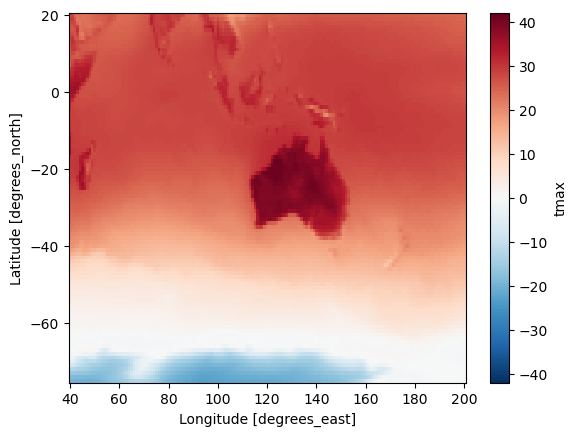

In [6]:
#Example Heatwave
TIME = ('2012-12-27','2013-01-03')














TMAX.sel(time = slice(TIME[0],TIME[1])).mean(dim='time').tmax.plot()























<xarray.DataArray 'uwnd1000' (lat: 96, lon: 161)>
array([[-8.9922267e-01, -7.0391023e-01, -5.0391018e-01, ...,
         1.1585898e+00,  1.2257771e+00,  1.2835896e+00],
       [-2.8695350e+00, -2.6210978e+00, -2.3835979e+00, ...,
         6.1796480e-01,  6.8671477e-01,  7.5546479e-01],
       [-4.4429727e+00, -4.1773477e+00, -3.9304729e+00, ...,
         9.2964754e-02,  1.9296482e-01,  2.6015228e-01],
       ...,
       [ 1.9367146e+00,  1.3242148e+00,  1.3539022e+00, ...,
        -7.6085978e+00, -7.3695350e+00, -7.2007852e+00],
       [ 1.0539023e+00,  7.4140233e-01,  8.6714759e-02, ...,
        -6.5898471e+00, -6.1726604e+00, -5.6632853e+00],
       [ 5.6952727e-01,  2.3397654e-03, -1.3398478e+00, ...,
        -5.7148476e+00, -5.4101601e+00, -5.0382857e+00]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -75.0 -74.0 -73.0 -72.0 -71.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float32 40.0 41.0 42.0 43.0 44.0 ... 197.0 198.0 199.0 200.0


<a list of 52 text.Text objects>

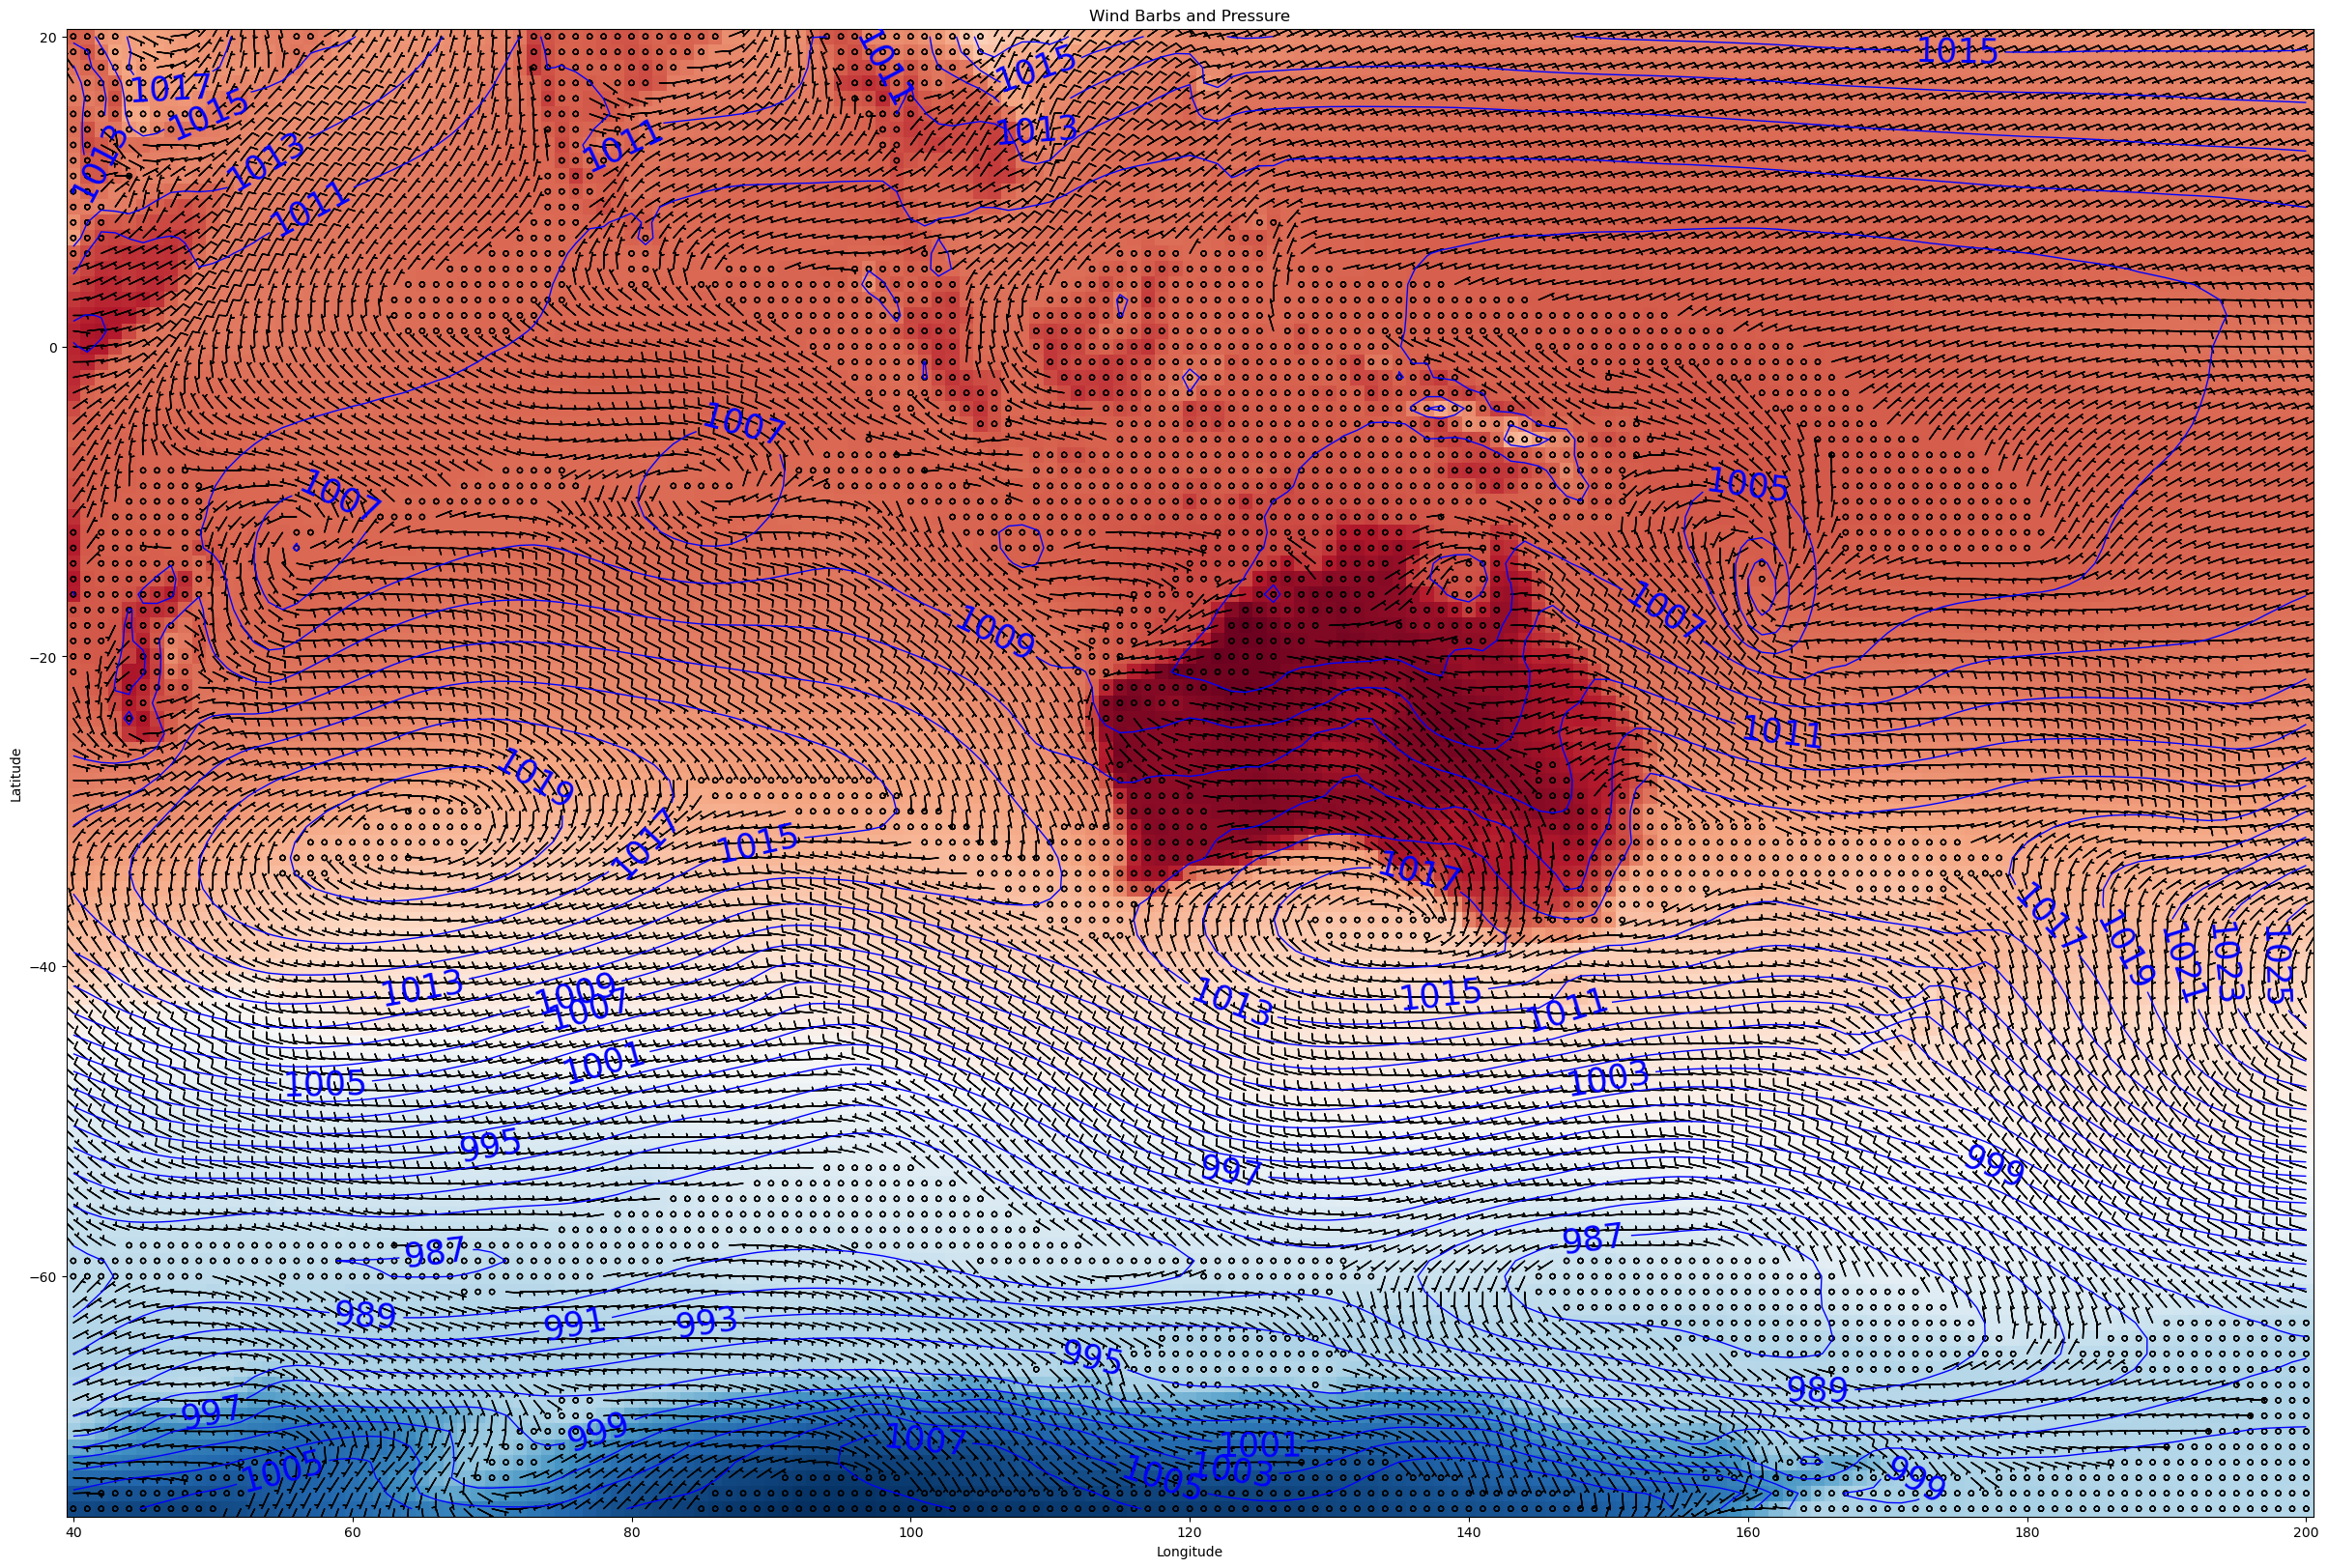

In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#Example Heatwave
TIME = ('2012-12-27','2013-01-03')

UWND200_Slc = UWND1000.sel(time = slice(TIME[0],TIME[1])).mean(dim='time')
VWND200_Slc = VWND1000.sel(time = slice(TIME[0],TIME[1])).mean(dim='time')

                          
# Extract the wind components
u_wind = UWND200_Slc['uwnd1000']  # N/S component
v_wind = VWND200_Slc['vwnd1000']  # E/W component
print(u_wind)
# Calculate the average over each 25x25 grid box centered at 27S latitude and 120E longitude
avg_u_wind = u_wind.rolling(lat=3, center=True, min_periods=1).mean().dropna('lat', 'all')
avg_v_wind = v_wind.rolling(lat=3, center=True, min_periods=1).mean().dropna('lat', 'all')


# Convert wind components to speed and direction
wind_speed = np.sqrt(avg_u_wind ** 2 + avg_v_wind ** 2)
wind_dir = np.arctan2(avg_v_wind, avg_u_wind) * 180 / np.pi


# Create a grid of coordinates
lon, lat = np.meshgrid(avg_u_wind.lon.values, avg_u_wind.lat.values)


# Plot the wind barbs for each 25x25 grid box
fig = plt.figure(figsize=(30, 20))
           
    

# Plot tmax using pcolormesh with custom color map
tmax_vals = TMAX.sel(time = slice(TIME[0],TIME[1])).mean(dim='time').tmax
cmap = plt.cm.RdBu_r

mesh = plt.pcolormesh(lon, lat, tmax_vals, cmap=cmap, shading='auto')







# Plot the wind barbs for each 25x25 grid box
plt.barbs(lon, lat, avg_u_wind.values, avg_v_wind.values, length=5, color='black')



plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Wind Barbs and Pressure')
# Add a world map overlay

# Create isobaric gradient line
MSLP = PRMSL.sel(time = slice(TIME[0],TIME[1])).mean(dim='time').prmsl
#MSLP = PRMSL.sel(time = TIME[0].mean(dim='time').prmsl



contour_levels = range(int(MSLP.min()), int(MSLP.max()), 2)
# Plot the isobaric gradient lines
contour = plt.contour(lon, lat, MSLP, levels=contour_levels, colors='blue', linewidths=1)

plt.clabel(contour, inline=True, fontsize=25, fmt='%1.0f')




